Model: "U_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │         20 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │        110 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │        110 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │        110 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         11 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cutoff (cutoff)     │ (None, 1)         │          0 │ input_layer[0][0… │
│                     │                   │            │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1570.6768
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1510.8416
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1459.2650
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1415.5886
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1378.3451
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1345.4579
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1314.9014
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1285.1212
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1255.1859
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1224.7078
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1193.6625
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1162.2211
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1130.6315
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1099.1440
Epoch 15/1000
1/1 ━━━━━━━━━━━━━

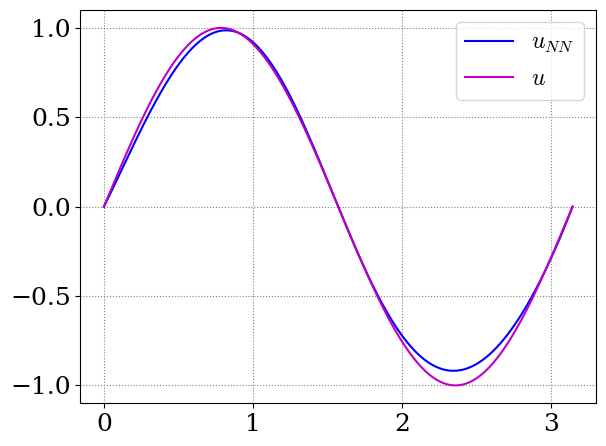

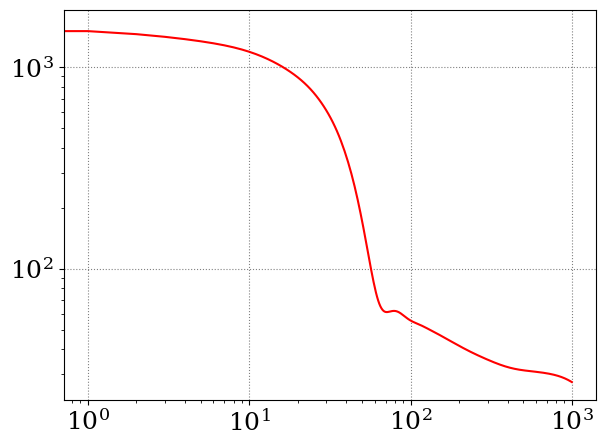

In [2]:
import tensorflow as tf
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Define the number of neuron per layer
NN = 10
#Define the number of layers 
NL = 5
#Define number of collocation points
N_points = 87
#
N_test = 50
# Define the number of epochs
N_epoch = 1000

#Define the source
def f_source(x):
    return 4*tf.sin(2*x)
def uexact(x):
    return tf.sin(2*x)


#Input dummy
X = tf.keras.layers.Input(shape = (1,))

#Define the first layer with dummy input
L1 = tf.keras.layers.Dense(units=NN, activation = 'tanh')(X)

#Feed the first layer to a generic layer for the number of layers, without the first and last layers
for l in range(NL - 2):
    L1 = tf.keras.layers.Dense(units=NN, activation = 'tanh')(L1)

#Last layer after being fed with the second to last layer (1 output)
L_last = tf.keras.layers.Dense(units=1, activation = 'tanh')(L1)


class cutoff(tf.keras.layers.Layer):

    def __init__(self, **kwargs):
        super(cutoff,self).__init__()

    def call(self,inputs):
    
        x,u =inputs
        cut = x*(x-np.pi)
        return tf.einsum("ji,ji->ji",cut,u)   
    
        return loss_out
    
    
L0 = cutoff()([X,L_last])

#Assembly the model
U_model = tf.keras.Model(inputs = X, outputs = L0, name = 'U_model')

#model summary
U_model.summary()


#Define a class for the loss, we are going to call this class in every iteration, evaluating this on the randomized sample, the target function and the output of the network
###############################################################################
#Parameters for the class "loss": U_model --> Neural Network Architecture     #
#           N_points --> Number of Sampled points across the problem's domain #
#           f_source --> Source function on the PDE -Δu = f                   #
###############################################################################
class loss(tf.keras.layers.Layer):

    def __init__(self, U_model, N_points,f_source, N_test, **kwargs):
        super(loss,self).__init__()
        self.U_model = U_model
        self.N_points = N_points
        self.f_source = f_source
        self.N_test = N_test

#Compute the derivative of the neural network U_nn
    def  call(self,inputs):
        
        #Get a sample of points in the domain for the integration. 
        N_pointsreal = random.randint(self.N_points-1, self.N_points)
        
        S = tf.experimental.numpy.linspace(0.,np.pi,num=N_pointsreal, dtype='float64')
       
        with tf.GradientTape(persistent=True) as t1:       
            t1.watch(S)
            ueval = self.U_model(S)
            u_x = t1.gradient(ueval,S)
              
        #Compute a vector of the source function evaluated in the sample points & 
        F = self.f_source(S)
        G = tf.experimental.numpy.asarray([(1/i)*(np.sqrt(2)/np.pi)*tf.math.sin(i*S) for i in range(1,self.N_test)])
    
        Integral_source = tf.einsum('i,ki->k',F,G)

        H = tf.experimental.numpy.asarray([(np.sqrt(2)/np.pi)*tf.cos(i*S) for i in range(1,self.N_test)])
    
        Integral_Unn = tf.einsum('i,ki->k',u_x,H)

        loss_out = tf.reduce_sum((-Integral_source + Integral_Unn)**2)
    
    
        #xlist = tf.experimental.numpy.linspace(0.,np.pi,num=10, dtype='float32')
        
        #tf.print(self.U_model(xlist))
        
        return loss_out

  

#Tell tensorlofw to recognize this class as a loss
def loss_model(U_model,N_points, f_source,N_test):
    Xl = tf.keras.layers.Input(shape = (1,))
    loss_layer = loss(U_model, N_points, f_source,N_test)(Xl)
    loss_f = tf.keras.Model(inputs = Xl, outputs = loss_layer)
    return loss_f


def loss_value(x,y):
    return y


#Assemble the model
model_all = loss_model(U_model, N_points, f_source,N_test)
optimizer = tf.keras.optimizers.Adam(learning_rate = 10**-3)
model_all.compile(optimizer = optimizer, loss = loss_value)

#Train the model
history = model_all.fit(np.array([1.]),np.array([1.]),epochs = N_epoch)


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 18
rcParams['legend.fontsize'] = 17
rcParams['mathtext.fontset'] = 'cm' 
rcParams['axes.labelsize'] = 19


# Generate a list of x values for visualization
xlist = tf.experimental.numpy.linspace(0.,np.pi,num=1000, dtype='float32')

## ---------
# Graph the Solution
## ---------

fig, ax = plt.subplots()
# Plot the approximate solution obtained from the trained model
plt.plot(xlist, U_model(xlist), color='b')
plt.plot(xlist, uexact(xlist), color='m')

plt.legend(['$u_{NN}$', '$u$'])

ax.grid(which = 'both', axis = 'both', linestyle = ':', color = 'gray')
plt.tight_layout()
plt.show()
Loss_rel = history.history['loss'] 
fig, ax = plt.subplots()
# Plot the approximate solution obtained from the trained model
plt.plot(Loss_rel, color='r')


ax.set_xscale('log')
ax.set_yscale('log')



ax.grid(which = 'major', axis = 'both', linestyle = ':', color = 'gray')
plt.tight_layout()
plt.show()




In [2]:
xlist = tf.experimental.numpy.linspace(0.,np.pi,num=10, dtype='float32')